# ARIMA MODEL WITH STATSMODELS LIBRARY

,Close
Date,
2010-01-01,14.479506
2010-02-01,13.385715
2010-03-01,14.039790
2010-04-01,13.940500
2010-05-01,12.445771


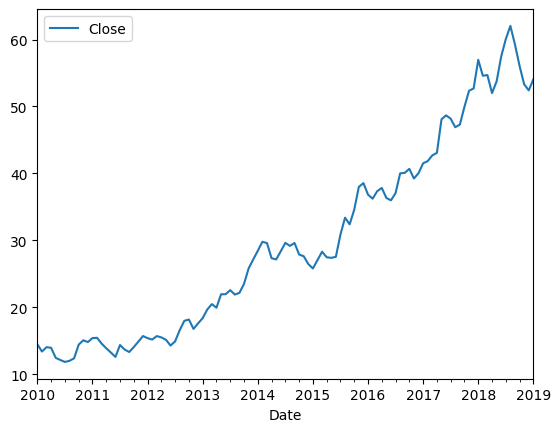

In [1258]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Google_Stock_Train (2010-2022).csv', parse_dates=['Date'])
df = df[['Date', 'Close']]
monthly_df = df.groupby(pd.Grouper(key='Date', freq='MS')).mean()
split_time = int(len(monthly_df) * 0.70)
df = monthly_df.iloc[:split_time]
# df = monthly_df
df.plot()
df.head()

In [1259]:
from statsmodels.tsa.stattools import adfuller

def adf_test(data):
    adf_res = adfuller(data)
    print(f'ADF Statistic: {adf_res[0]}')
    print(f'p-value: {adf_res[1]}')
    if adf_res[1] <= 0.05:
        print('Stationary')
    else:
        print('Non-Stationary')
    print(" ")

In [1260]:
adf_test(df)

ADF Statistic: 1.0091454646497582
p-value: 0.9943615126825811
Non-Stationary
 


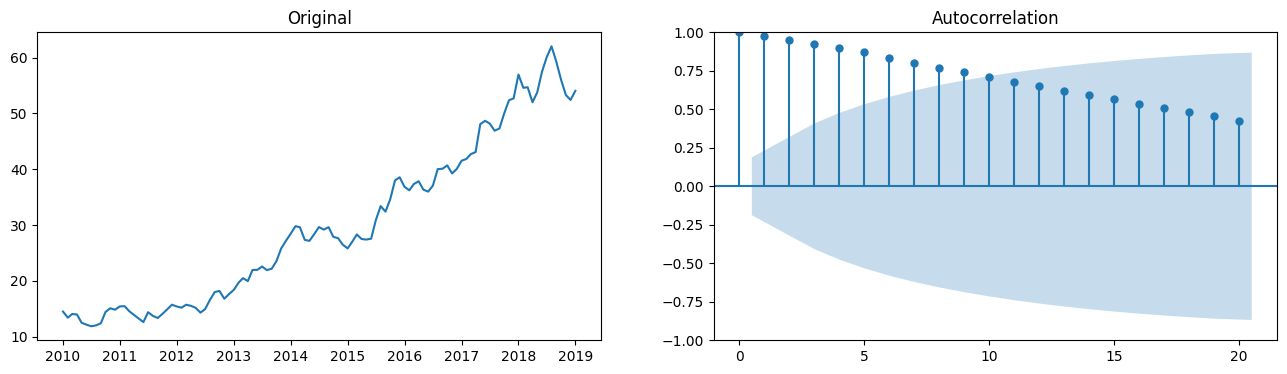

In [1261]:
from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df)
ax1.set_title('Original')

acf = plot_acf(df, lags=20, ax=ax2)

In [1262]:
import pandas as pd

df_diff = df.diff().dropna()
adf_test(df_diff)

ADF Statistic: -3.4134477996464594
p-value: 0.010508890934189916
Stationary
 


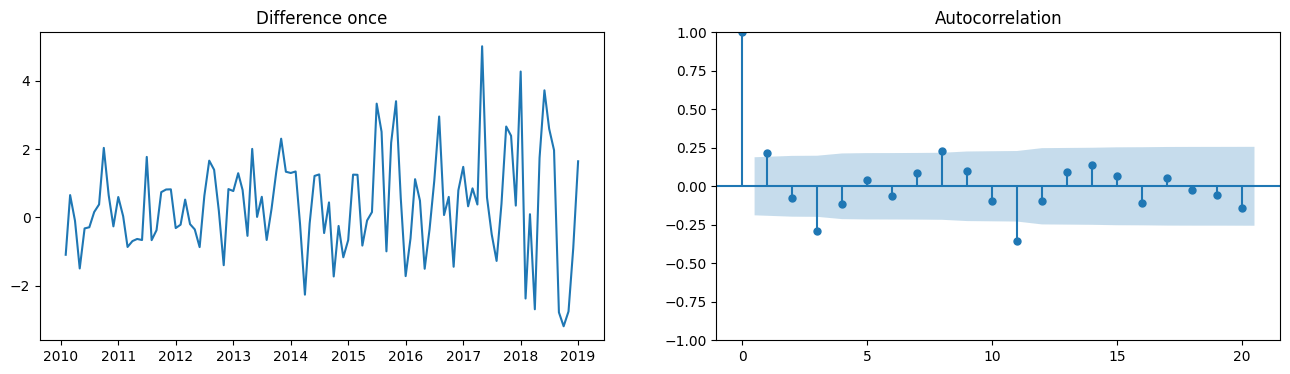

In [1263]:
from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df_diff)
ax1.set_title('Difference once')

acf = plot_acf(df_diff, lags=20, ax=ax2)

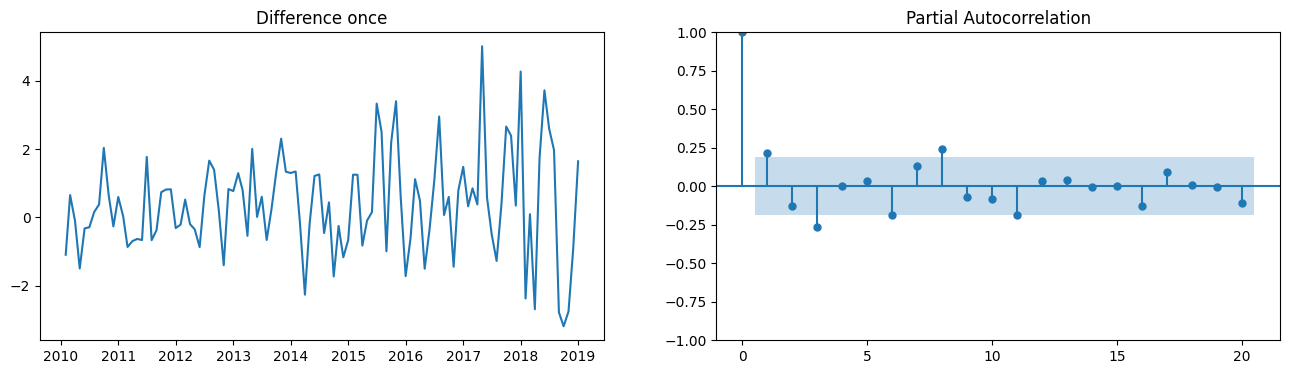

In [1264]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(df_diff)
ax1.set_title('Difference once')
pacf = plot_pacf(df_diff, lags=20, ax=ax2)

In [1265]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df.Close, order=(3, 1, 11))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  109
Model:                ARIMA(3, 1, 11)   Log Likelihood                -179.929
Date:                Wed, 18 Oct 2023   AIC                            389.858
Time:                        20:58:48   BIC                            430.090
Sample:                    01-01-2010   HQIC                           406.170
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0127      0.456     -0.028      0.978      -0.905       0.880
ar.L2         -0.1742      0.327     -0.532      0.594      -0.816       0.467
ar.L3         -0.2454      0.404     -0.608      0.5

(array([0.05216236, 0.27124429, 0.19300074, 0.04172989, 0.00521624,
        0.        , 0.        , 0.        , 0.        , 0.00521624]),
 array([-3.10848535, -1.34968623,  0.4091129 ,  2.16791202,  3.92671115,
         5.68551027,  7.4443094 ,  9.20310852, 10.96190765, 12.72070677,
        14.47950589]),
 <BarContainer object of 10 artists>)

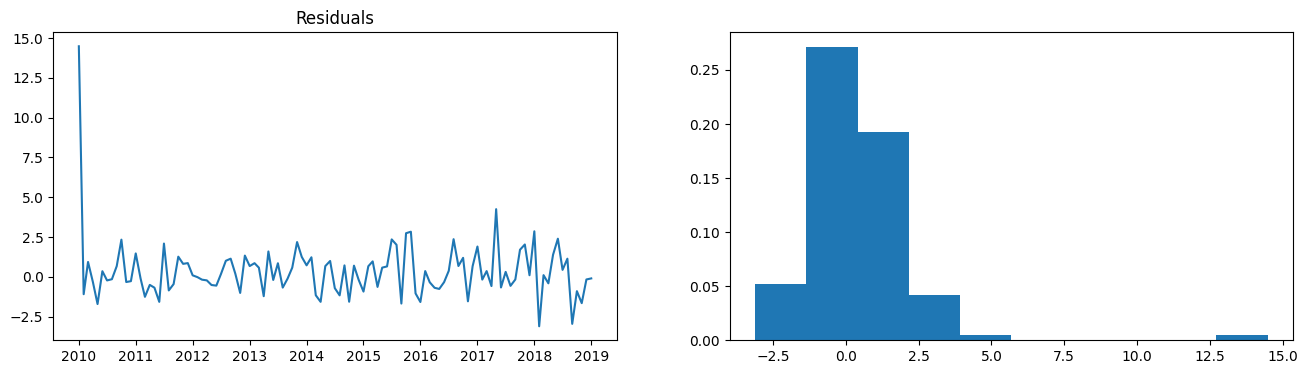

In [1266]:
residuals = pd.DataFrame(result.resid)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(residuals)
ax1.set_title('Residuals')
ax2.hist(residuals, density=True)

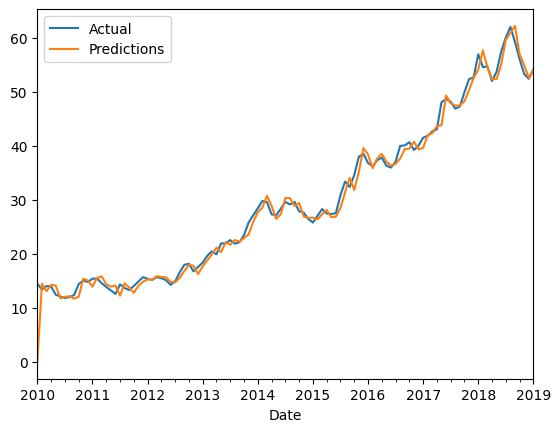

In [1267]:
df.Close.plot()
predictions = result.predict(start=0, end=len(df) - 1)
predictions.plot()
plt.legend(['Actual', 'Predictions'])

In [1268]:
split = int(len(df) * 0.9)

train_data = df[:split]
test_data = df[split:]

print(len(train_data), len(test_data))

98 11


In [1269]:
adf_test(train_data)

train_data_diff = train_data.diff().dropna()
adf_test(train_data_diff)

ADF Statistic: 1.215730355573412
p-value: 0.9960927833164656
Non-Stationary
 
ADF Statistic: -2.96032941757495
p-value: 0.0387689056560767
Stationary
 


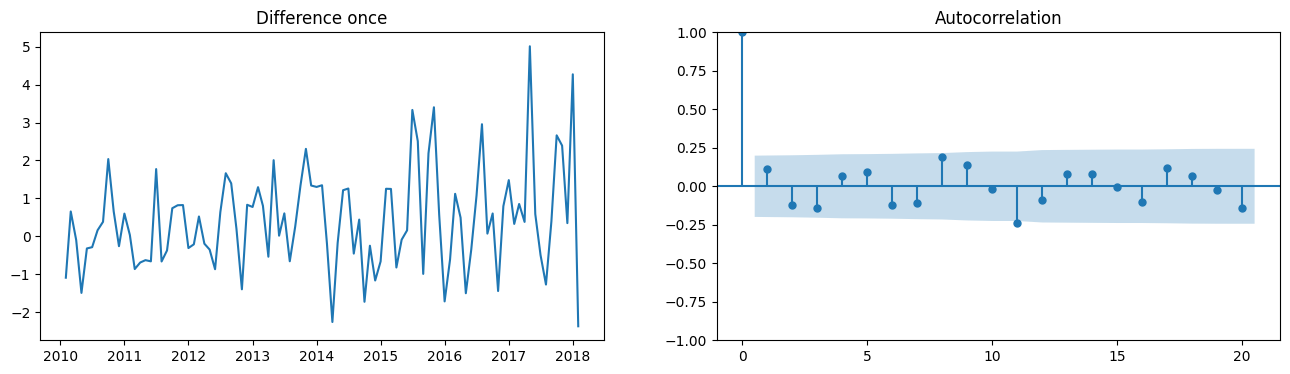

In [1270]:
from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(train_data_diff)
ax1.set_title('Difference once')

acf = plot_acf(train_data_diff, ax=ax2)

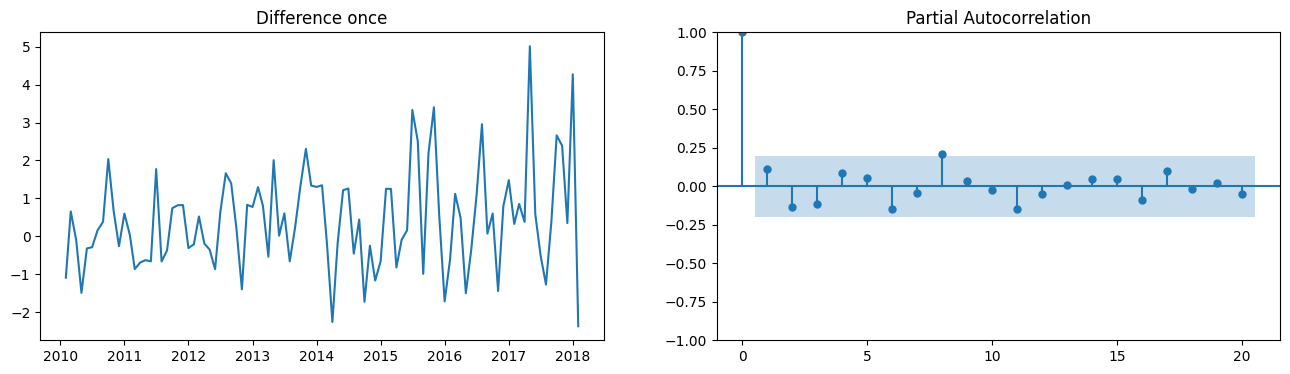

In [1271]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(train_data_diff)
ax1.set_title('Difference once')

pacf = plot_pacf(train_data_diff, ax=ax2)

In [1272]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data.Close, order=(2, 1, 9))
train_data_result = model.fit()
print(train_data_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   98
Model:                 ARIMA(2, 1, 9)   Log Likelihood                -159.323
Date:                Wed, 18 Oct 2023   AIC                            342.647
Time:                        20:58:51   BIC                            373.543
Sample:                    01-01-2010   HQIC                           355.140
                         - 02-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6507      0.205      3.182      0.001       0.250       1.051
ar.L2         -0.6087      0.147     -4.150      0.000      -0.896      -0.321
ma.L1         -0.4638      0.181     -2.555      0.0

/Users/DNK/PycharmProjects/ML+DA/venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


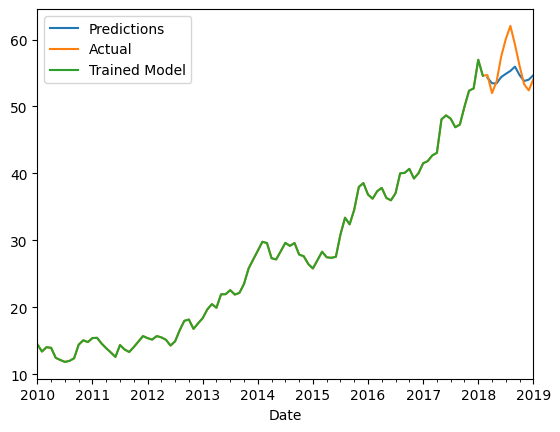

In [1273]:
test_prediction = train_data_result.predict(start=len(train_data), end=len(df) - 1)

test_prediction.plot()
df.Close.plot()
train_data.Close.plot()

plt.legend(['Predictions', 'Actual', 'Trained Model'])

MAPE: 3.8233723529743586


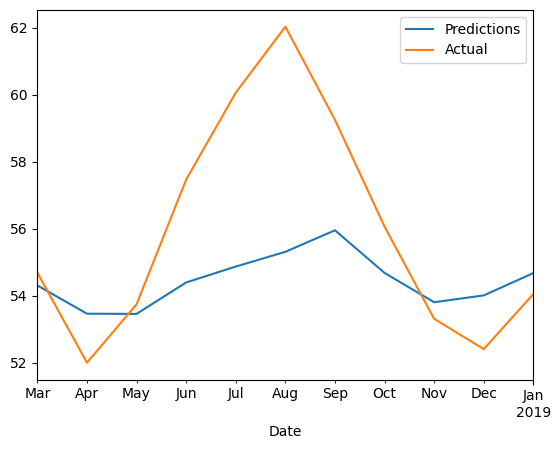

In [1274]:
from sklearn.metrics import mean_absolute_percentage_error
test_prediction.plot()
test_data.Close.plot()
plt.legend(['Predictions', 'Actual'])

MAPE = (mean_absolute_percentage_error(test_data.Close, test_prediction)) * 100
print('MAPE: %s' % MAPE)

# MY ARIMA REALISATION




In [1275]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Google_Stock_Train (2010-2022).csv', parse_dates=['Date'])
df = df[['Date', 'Close']]
monthly_df = df.groupby(pd.Grouper(key='Date', freq='MS')).mean()
split_time = int(len(monthly_df) * 0.70)
df = monthly_df.iloc[:split_time]
# df = monthly_df
# df.plot()

In [1276]:
from statsmodels.tsa.stattools import adfuller

def adf_test(data):
    adf_res = adfuller(data)
    print(f'ADF Statistic: {adf_res[0]}')
    print(f'p-value: {adf_res[1]}')
    if adf_res[1] <= 0.05:
        print('Stationary')
    else:
        print('Non-Stationary')
    print(" ")


In [1277]:
import numpy as np
import pandas as pd

def linear_regression(X, y):
    ones = np.ones((X.shape[0], 1))
    X = np.concatenate((ones, X), axis=1)

    theta = np.linalg.inv(X.T @ X) @ X.T @ y

    return theta[1:], theta[0]


In [1278]:

def auto_reg(p, series):
    df_lags = series.copy()
    df_lags = pd.concat([df_lags] + [df_lags['Close'].shift(i)
                        .rename(f'Lags_{i}') for i in range(1, p + 1)], axis=1)

    train = df_lags.copy().dropna()

    X_train = train.iloc[:, 1:p + 1].values
    y_train = train.iloc[:, 0].values.reshape(-1, 1)

    theta, intercept = linear_regression(X_train, y_train)
    train['Predicted'] = X_train.dot(theta) + intercept

    train['Residuals'] = train.iloc[:, 0] - train['Predicted']
    train_residuals = train[['Residuals']]
    residuals = train_residuals

    RMSE = np.sqrt(np.mean((train['Close'] - train['Predicted']) ** 2))

    return train, theta, intercept, RMSE, residuals


In [1279]:
def integrated(data, lag=1):
    data_diff = pd.DataFrame(data.Close.diff(lag).dropna())
    return data_diff


In [1280]:
from sklearn.metrics import mean_squared_error

def mov_avg(q, residuals):
    residuals = pd.concat([residuals] + [residuals['Residuals'].shift(i)
                          .rename(f'Lags_{i}') for i in range(1, q + 1)],axis=1)
    residuals.iloc[:, 1:] = residuals.iloc[:, 1:].fillna(value=0)
    train = residuals.copy().dropna()

    train.iloc[:, 0] = train.iloc[:, 0].values - train.iloc[:, 1].values
    X_train = train.iloc[:, 1:q + 1].values
    y_train = train.iloc[:, 0].values.reshape(-1, 1)

    theta, intercept = linear_regression(X_train, y_train)
    train['Predicted'] = X_train.dot(theta) + intercept

    RMSE = np.sqrt(mean_squared_error(train['Residuals'], train['Predicted']))

    return train, theta, intercept, RMSE, residuals


In [1281]:
def fit_arima(dataframe, p, d, q):
    df1 = integrated(dataframe, d)
    ar_train, ar_theta, ar_intercept, ar_rmse, ar_residuals = auto_reg(p, pd.DataFrame(df1))
    ma_train, ma_theta, ma_intercept, ma_rmse, resids = mov_avg(q, ar_residuals)
    result_df = ar_train.copy()
    result_ma = ma_train.copy()
    result_df.Predicted += result_ma.Predicted
    return ar_train, ar_theta, ar_intercept, ar_rmse, ma_train, ma_theta, ma_intercept, ma_rmse, result_df

In [1282]:
def split_dataframe(dataframe, percentage):
    split = int(len(dataframe) * percentage)
    train = dataframe.iloc[:split].dropna()
    test = dataframe.iloc[split:].dropna()
    return train, test


In [1283]:
def forecast(dataframe, p, d, q, n):
    ar_train, ar_theta, ar_intercept, ar_rmse, ma_train, ma_theta, ma_intercept, ma_rmse, result_df = fit_arima(
        dataframe, p, d, q)
    forecast = []
    prev_lags_ar = []
    prev_lags_ma = []

    # prev_lags_ar.append(result_df['Close'].tail(p).values)
    # prev_lags_ma.append(result_df['Close'].tail(q).values - result_df['Predicted'].tail(q).values)
    prev_predict = result_df['Predicted'].tail(1).values

    for i in range(n):
        # ar_pred = np.sum(prev_lags_ar[i] * ar_theta) + ar_intercept
        # ma_pred = np.sum(prev_lags_ma[i] * ma_theta) + ma_intercept
        ar_pred = np.sum(prev_predict * ar_theta) + ar_intercept
        ma_pred = np.sum(prev_predict * ma_theta) + ma_intercept
        pred = ar_pred + ma_pred
        forecast.append(pred)
        # prev_lags_ar.append(np.append(prev_lags_ar[i][1:], pred))
        # prev_lags_ma.append(np.append(prev_lags_ma[i][1:], pred - ar_pred))
        prev_predict = np.array([pred])

    forecast_df = pd.DataFrame()
    start_date = dataframe.index[-1] + pd.DateOffset(months=1)
    forecast_dates = pd.date_range(start=start_date, periods=n, freq='MS')
    forecast_df['Date'] = forecast_dates
    for i in range(len(forecast)):
        forecast_df.loc[i, 'Forecast'] = forecast[i]
    forecast_df.set_index('Date', inplace=True)

    return result_df, forecast_df


In [1284]:
def undo_differencing(original_df, trained_df, tested_df):
    tested_df.Forecast += original_df.shift(1).Close
    tested_df.Forecast += original_df.diff().shift(1).Close

    trained_df.Close += original_df.shift(1).Close
    trained_df.Close += original_df.diff().shift(1).Close
    trained_df.Predicted += original_df.shift(1).Close
    trained_df.Predicted += original_df.diff().shift(1).Close

    return trained_df, tested_df

In [1285]:
def undo_diff_trained(original_df, trained_df):
    trained_df.Close += original_df.shift(1).Close
    trained_df.Close += original_df.diff().shift(1).Close
    trained_df.Predicted += original_df.shift(1).Close
    trained_df.Predicted += original_df.diff().shift(1).Close

    return trained_df

In [1286]:
def plot_results(original_df, trained_df, tested_df):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.plot(original_df.Close)
    ax1.plot(trained_df.Predicted)
    ax1.plot(tested_df.Forecast)
    labels = ['Original', 'Train', 'Forecast']
    ax1.set_xlim([original_df.index[0], tested_df.index[-1]])
    plt.legend(labels)

In [1287]:
def plot_forecast(test, forecast):
    fig, ax2 = plt.subplots(figsize=(10, 6))
    ax2.plot(test.Close)
    ax2.plot(forecast.Forecast)
    labels = ['Test Data', 'Forecast']
    ax2.set_xlim([test.index[0], test.index[-1]])
    plt.legend(labels)

Model: ARIMA(2,1,9)
No. of observations: 109
AR RMSE: 1.4348404723019228
MA RMSE: 1.272996655236317
ARIMA RMSE: 2.70783712753824
                Close    Lags_1    Lags_2  Predicted  Residuals
Date                                                           
2010-04-01  14.594575  0.654075 -1.093791  15.338805  -0.743157
2010-05-01  12.346481 -0.099290  0.654075  14.829274  -1.714897
2010-06-01  10.629190 -1.494729 -0.099290  12.603279  -0.286163
2010-07-01  11.514139 -0.321851 -1.494729  12.620507  -0.736165
2010-08-01  11.706896 -0.287929 -0.321851  13.260847  -0.142598
...               ...       ...       ...        ...        ...
2018-09-01  61.221110  1.969505  2.597190  62.657308  -3.271069
2018-10-01  53.281714 -2.781091  1.969505  58.405328  -2.551012
2018-11-01  50.119604 -3.188801 -2.781091  54.404288  -2.642324
2018-12-01  49.650101 -2.754400 -3.188801  52.765500  -0.956599
2019-01-01  53.145524 -0.903904 -2.754400  54.534001   1.178105

[106 rows x 5 columns]


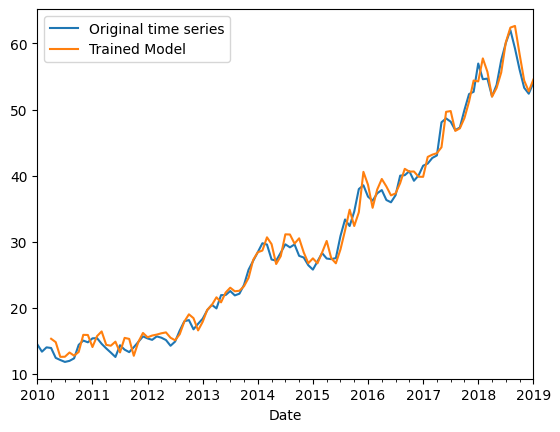

In [1288]:
train_df, test_df = split_dataframe(df, 0.9)

ar_train, ar_theta, ar_intercept, ar_rmse, ma_train, ma_theta, ma_intercept, ma_rmse, result_df = fit_arima(df, 2, 1, 9)
result_df = undo_diff_trained(df, result_df)

print('Model: ARIMA(2,1,9)')
print('No. of observations: %s' % len(df))
print('AR RMSE: %s' % ar_rmse)
print('MA RMSE: %s' % ma_rmse)
print('ARIMA RMSE: %s' % (ar_rmse + ma_rmse))
print(result_df)


df.Close.plot()
result_df.Predicted.plot()
plt.legend(['Original time series', 'Trained Model'])

MAPE: 3.726801416483485


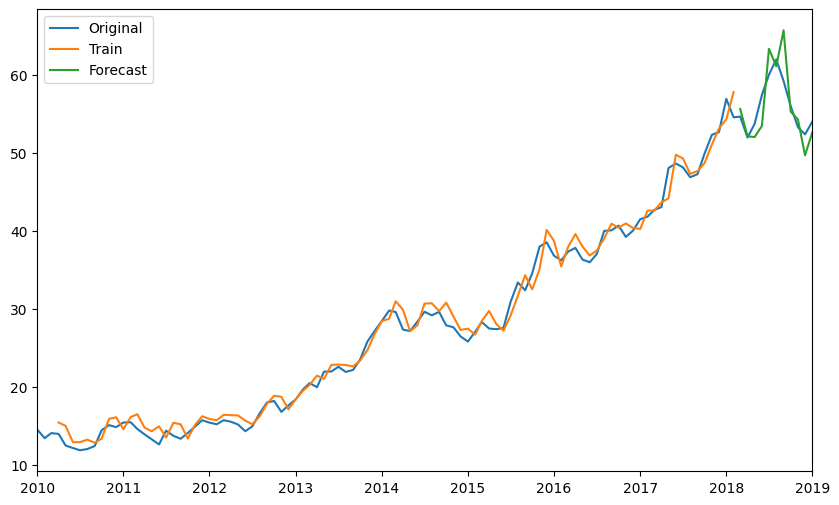

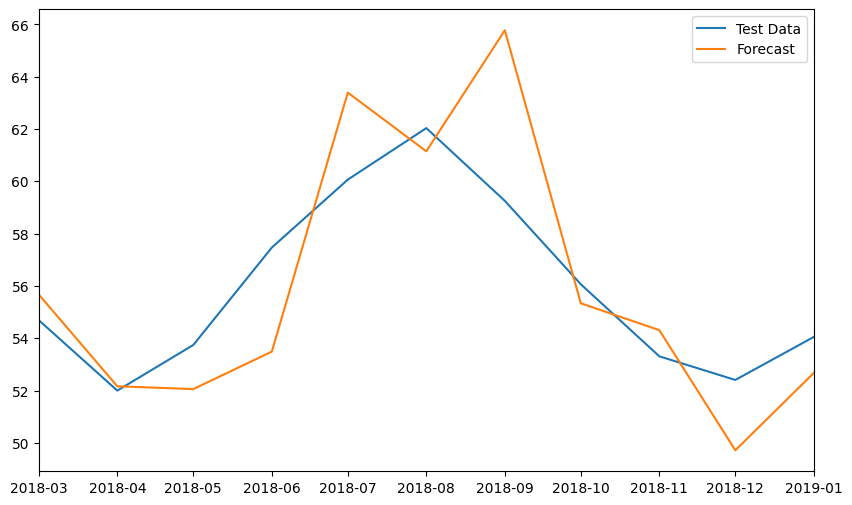

In [1289]:
train_df, test_df = split_dataframe(df, 0.9)

result_df, forecast_df = forecast(train_df, 2, 1, 9, 11)
result_df, forecast_df = undo_differencing(df, result_df, forecast_df)

plot_results(df, result_df, forecast_df)
plot_forecast(test_df, forecast_df)

MAPE = (mean_absolute_percentage_error(test_df.Close, forecast_df.Forecast)) * 100
print('MAPE: %s' % MAPE)

MAPE-two_arimas: 6.054628089821767
MAPE-auto_actual: 3.8233723529743586
MAPE-self_actual: 3.726801416483485


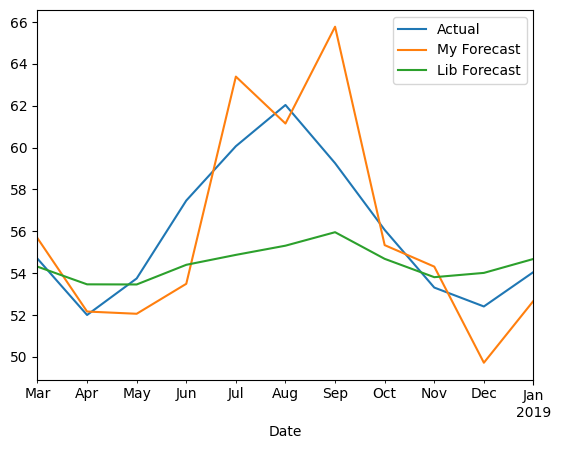

In [1290]:
test_data.Close.plot()
forecast_df.Forecast.plot()
test_prediction.plot()

plt.legend(['Actual', 'My Forecast', 'Lib Forecast'])

MAPE_Arimas = (mean_absolute_percentage_error(test_prediction, forecast_df.Forecast)) * 100
print('MAPE-two_arimas: %s' % MAPE_Arimas)

MAPE_Auto = (mean_absolute_percentage_error(test_data.Close, test_prediction)) * 100
print('MAPE-auto_actual: %s' % MAPE_Auto)

MAPE_Self = (mean_absolute_percentage_error(test_data.Close, forecast_df.Forecast)) * 100
print('MAPE-self_actual: %s' % MAPE_Self)